In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_csv('application_train.csv')
df_test = pd.read_csv('application_test.csv')

In [3]:
def null_percentage(data):
    null_values_total = data.isnull().sum().sort_values(ascending = False)
    total_null_percent = (data.isnull().sum()/data.isnull().count() * 100).sort_values(ascending = False)
    return pd.concat([null_values_total, total_null_percent], axis = 1, keys = ['Total', 'Percent'])

In [4]:
print("The shape of the training dataset is: {}".format(df_train.shape))
print("The shape of the testing dataset is: {}".format(df_test.shape))

The shape of the training dataset is: (307511, 122)
The shape of the testing dataset is: (48744, 121)


In [6]:
# Dropping columns that contain more than 50 percent null values per feature
for column in df_train.columns:
    if null_percentage(df_train[column].to_frame())['Percent'][0] > 50.00:
        df_train.drop([column], axis = 1, inplace = True)
        df_test.drop([column], axis = 1, inplace = True)

In [8]:
def mean_imputation(data, inplace = False):
    """
    This function would take the NULL values present in data and replace them with average values of the data respectively.
    """
    data.fillna(data.mean(), inplace = inplace)

def median_imputation(data, inplace = False):
    """
    This function would take the NULL values present in data and replace them with median values in our data respectively.
    """
    data.fillna(data.median(), inplace = inplace)

def mode_imputation(data, inplace = False):
    """
    This function would take the NULL values present in data and replace them with mode values of the given data respectively.
    """
    data.fillna(data.mode(), inplace = inplace)

In [9]:
mean_imputation(df_train['FLOORSMAX_AVG'], inplace = True)
mean_imputation(df_train['FLOORSMAX_MEDI'], inplace = True)
mean_imputation(df_train['FLOORSMAX_MODE'], inplace = True)
mean_imputation(df_train['YEARS_BEGINEXPLUATATION_AVG'], inplace = True)
mean_imputation(df_train['YEARS_BEGINEXPLUATATION_MEDI'], inplace = True)
mean_imputation(df_train['YEARS_BEGINEXPLUATATION_MODE'], inplace = True)

In [11]:
null_percent_values = null_percentage(df_train)['Percent']
features_with_low_null_values = []
for i in range(len(df_train.columns)):
    if null_percent_values.iloc[i] < 10.0:
        features_with_low_null_values.append(null_percent_values.index[i]) 

In [12]:
df_train_converted = df_train[features_with_low_null_values]

In [13]:
## This is done to get the categorical features. We can then perform mode imputation to get the values respectively.
## The suggestion was implemented from the website https://stackoverflow.com/questions/29803093/check-which-columns-in-dataframe-are-categorical
total_columns =df_train_converted.columns 
numeric_data = df_train_converted._get_numeric_data()
categorical_columns = list(set(total_columns) - set(numeric_data.columns))

In [14]:
categorical_data = df_train_converted[categorical_columns]

In [15]:
mode_imputation(categorical_data, inplace = True)

In [16]:
categorical_data['NAME_TYPE_SUITE'].fillna(value = 'Unaccompanied', inplace = True)

In [17]:
numeric_data.head()

,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_6,...,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,TARGET,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,SK_ID_CURR
0,2.0,2.0,2.0,2.0,0.262949,351000.0,24700.5,1.0,-1134.0,0,...,0,0,0,1,0.972200,0.083300,0.972200,0.083300,0.972200,100002
1,0.0,1.0,0.0,1.0,0.622246,1129500.0,35698.5,2.0,-828.0,0,...,0,0,0,0,0.985100,0.291700,0.985100,0.291700,0.985100,100003
2,0.0,0.0,0.0,0.0,0.555912,135000.0,6750.0,1.0,-815.0,0,...,0,0,0,0,0.977735,0.226282,0.977065,0.222315,0.977752,100004
3,0.0,2.0,0.0,2.0,0.650442,297000.0,29686.5,2.0,-617.0,0,...,0,0,0,0,0.977735,0.226282,0.977065,0.222315,0.977752,100006
4,0.0,0.0,0.0,0.0,0.322738,513000.0,21865.5,1.0,-1106.0,0,...,0,1,1,0,0.977735,0.226282,0.977065,0.222315,0.977752,100007


In [18]:
categorical_data.head()

,FLAG_OWN_REALTY,NAME_CONTRACT_TYPE,ORGANIZATION_TYPE,NAME_TYPE_SUITE,NAME_EDUCATION_TYPE,WEEKDAY_APPR_PROCESS_START,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,CODE_GENDER,NAME_INCOME_TYPE,FLAG_OWN_CAR
0,Y,Cash loans,Business Entity Type 3,Unaccompanied,Secondary / secondary special,WEDNESDAY,Single / not married,House / apartment,M,Working,N
1,N,Cash loans,School,Family,Higher education,MONDAY,Married,House / apartment,F,State servant,N
2,Y,Revolving loans,Government,Unaccompanied,Secondary / secondary special,MONDAY,Single / not married,House / apartment,M,Working,Y
3,Y,Cash loans,Business Entity Type 3,Unaccompanied,Secondary / secondary special,WEDNESDAY,Civil marriage,House / apartment,F,Working,N
4,Y,Cash loans,Religion,Unaccompanied,Secondary / secondary special,THURSDAY,Single / not married,House / apartment,M,Working,N


In [23]:
import missingno as msno
import matplotlib.pyplot as plt

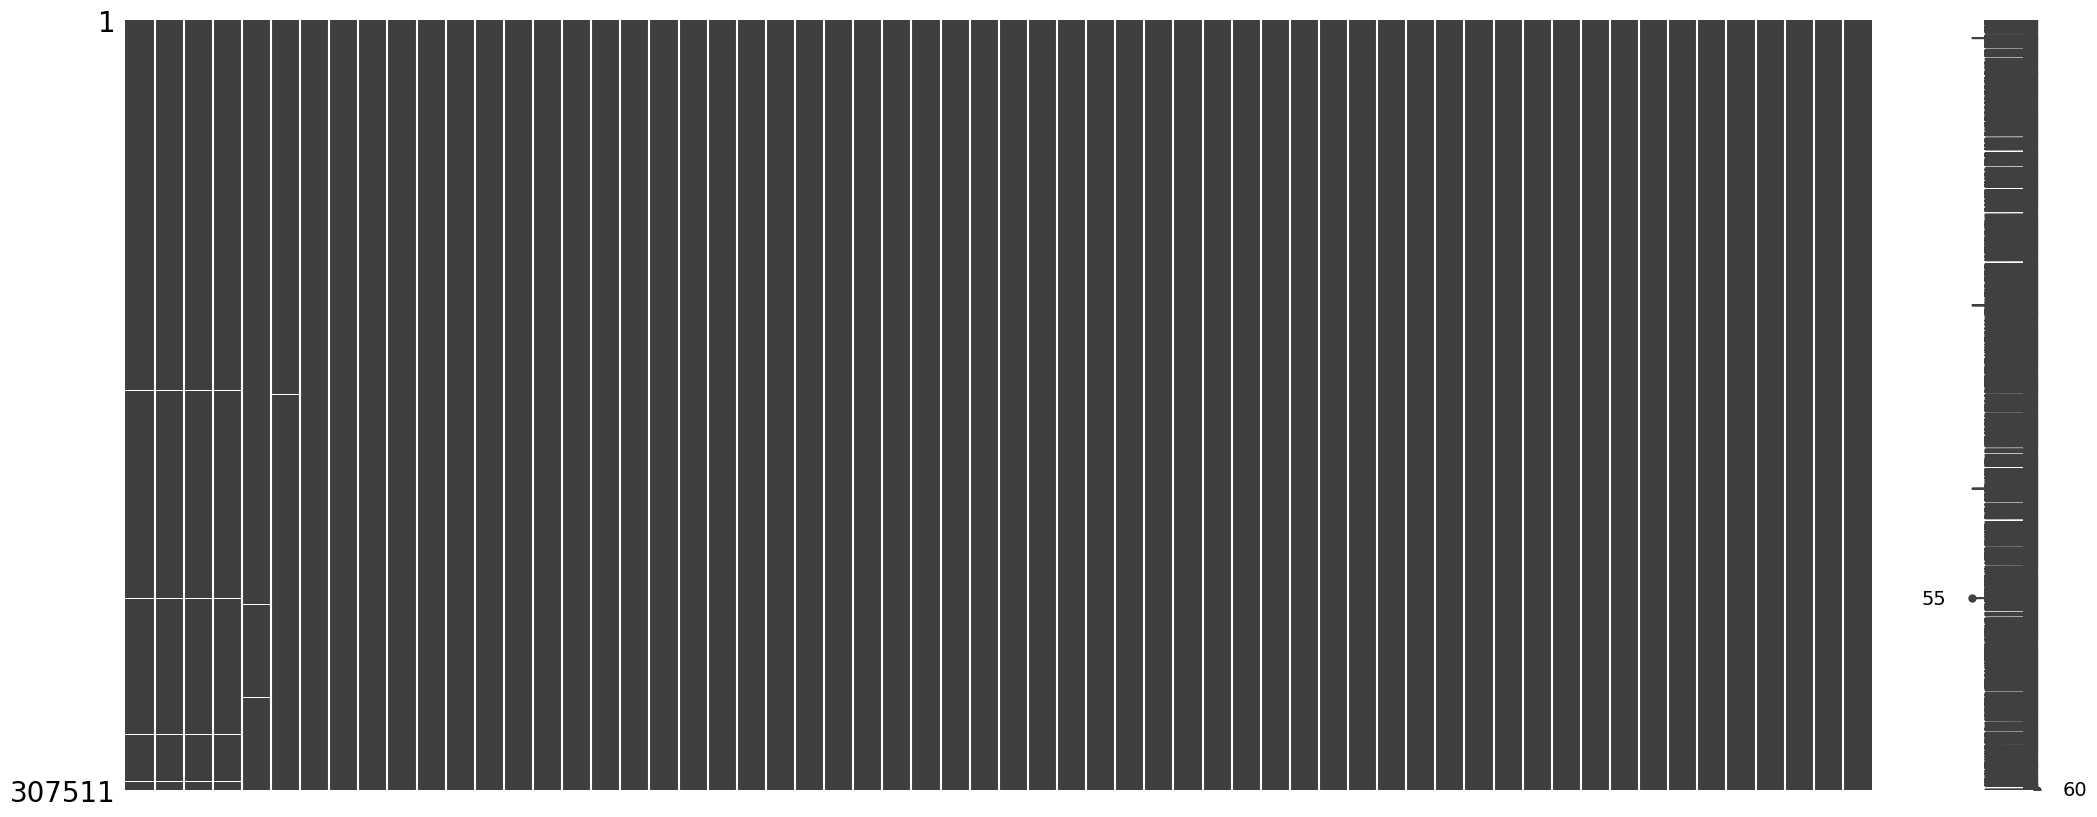

In [24]:
msno.matrix(numeric_data)
plt.show()

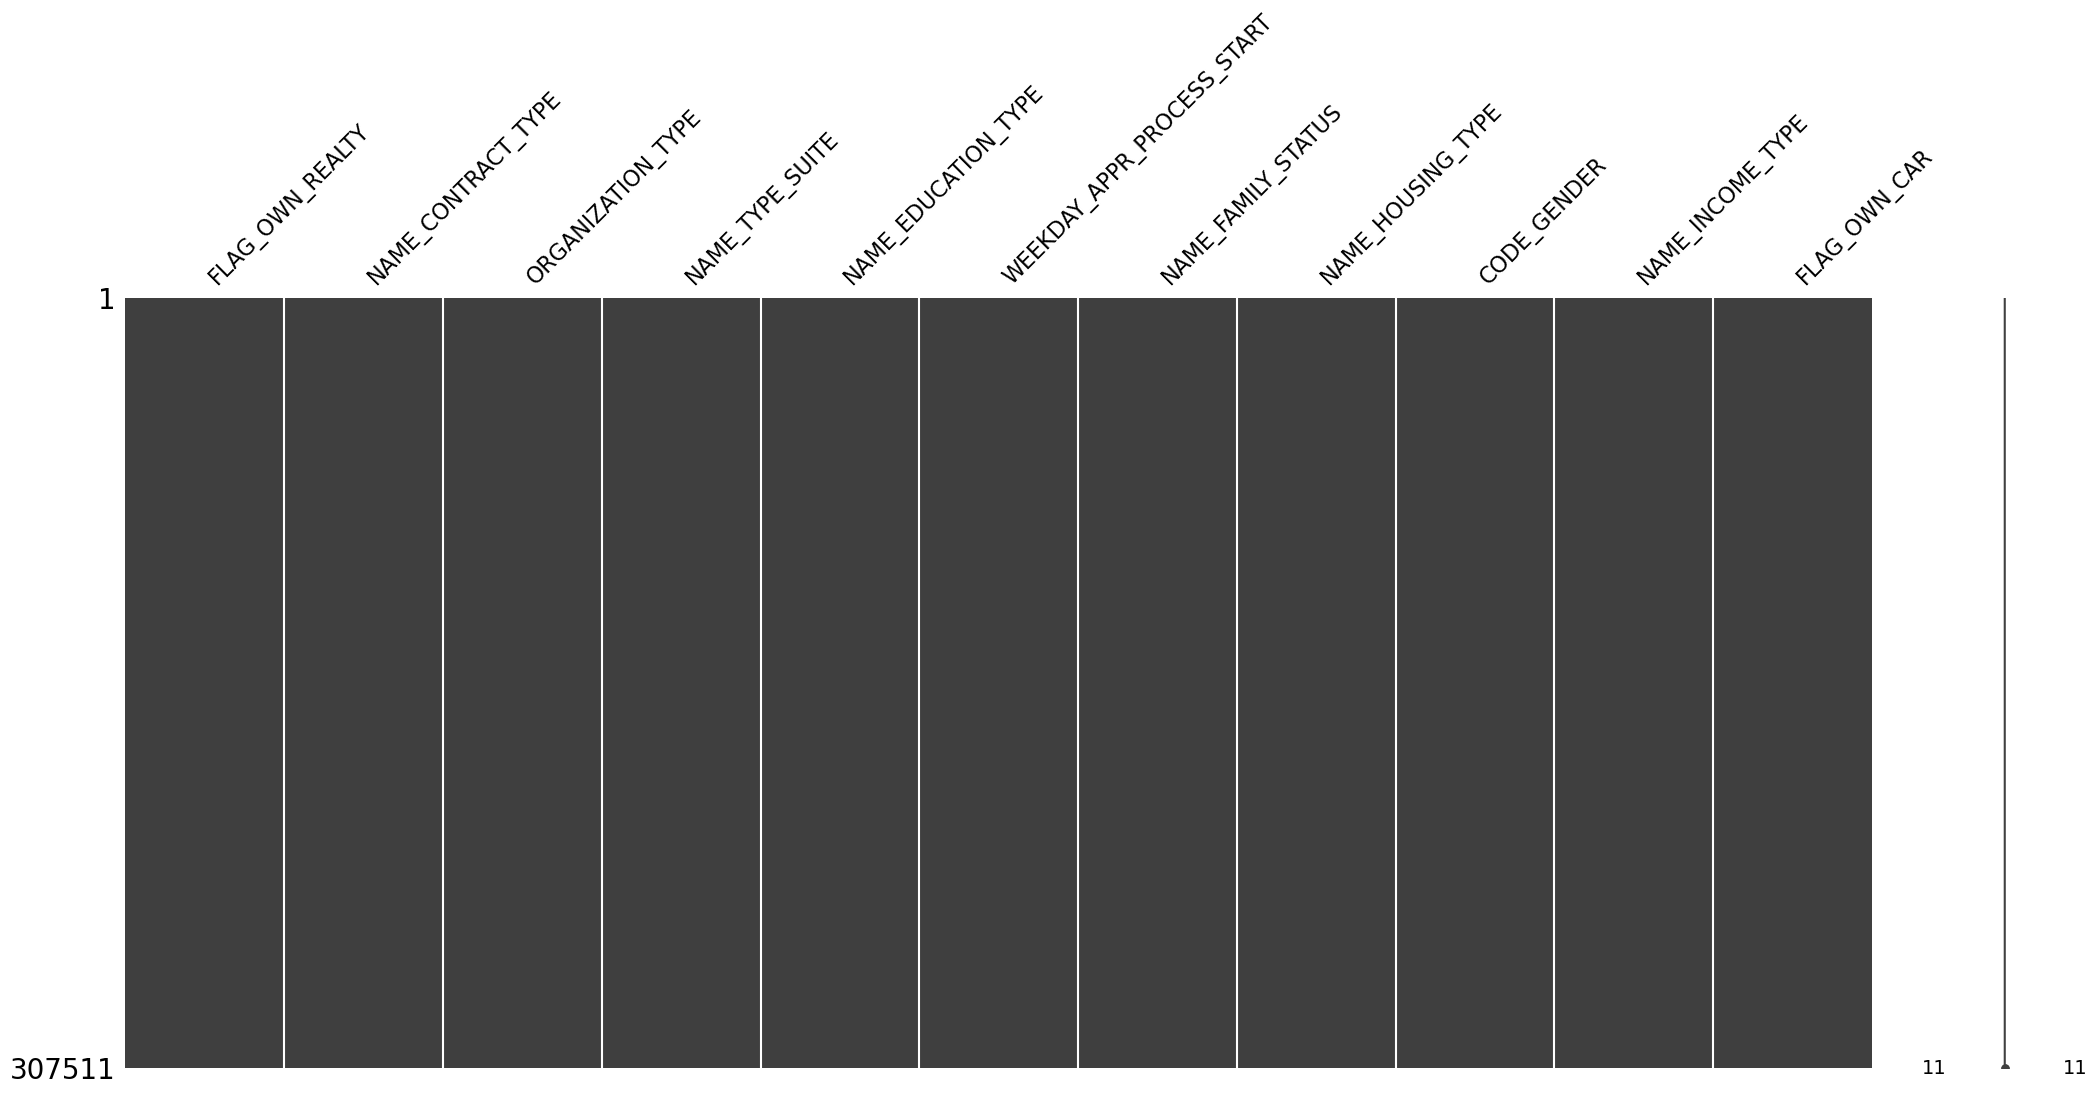

In [25]:
msno.matrix(categorical_data)
plt.show()